In [1]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import pandas as pd 

train_test_split 

%matplotlib inline

In [2]:
train_house = pd.read_csv('D:/Datasets/House//train.csv') 
test_house = pd.read_csv('D:/Datasets/House//test.csv') 
sample  = pd.read_csv('D:/Datasets/House//sample_submission.csv') 

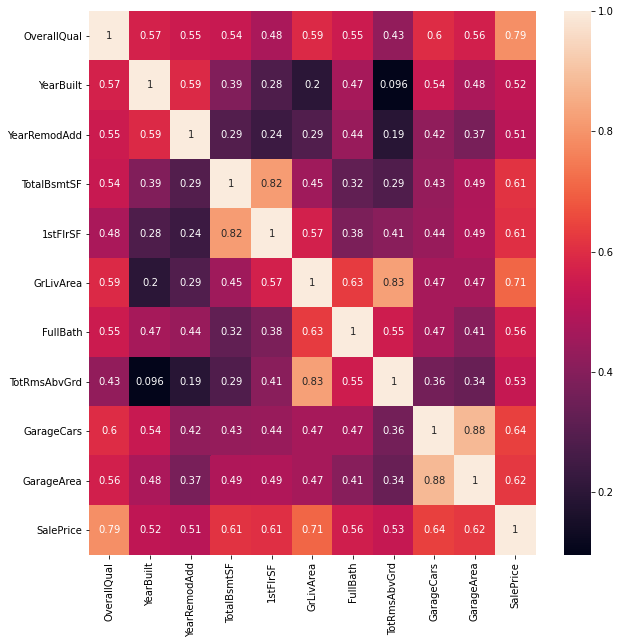

In [3]:
corrmat = train_house.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_house[top_corr_features].corr(),annot=True)

Find correlated variables, remove one of them

In [4]:
def correlation (column_1, column_2):
    print(f'Корреляция между {column_1.name} и {column_2.name} = {column_1.corr(column_2, "pearson")}' )

In [5]:
d = list(map(correlation, *zip( \
                               (train_house['GarageArea'], train_house['GarageCars']),\
                               (train_house['YearBuilt'], train_house['GarageYrBlt']), \
                               (train_house['TotRmsAbvGrd'], train_house['GrLivArea']), \
                               (train_house['TotalBsmtSF'], train_house['1stFlrSF']))))

Корреляция между GarageArea и GarageCars = 0.8824754142814628
Корреляция между YearBuilt и GarageYrBlt = 0.825667484174342
Корреляция между TotRmsAbvGrd и GrLivArea = 0.8254893743088428
Корреляция между TotalBsmtSF и 1stFlrSF = 0.8195299750050333


In [6]:
train_house = train_house.drop(columns=['GarageArea'])
train_house = train_house.drop(columns=['GarageYrBlt'])

train_house = train_house.drop(columns=['TotRmsAbvGrd'])
train_house = train_house.drop(columns=['1stFlrSF'])

Find out how many missing values are in the data

In [7]:
total = train_house.isnull().sum().sort_values(ascending=False)
total.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
KitchenAbvGr       0
Functional         0
dtype: int64

In [8]:
train_house = train_house.drop(columns=['MiscFeature'])      

We delete, since there are really a lot of missing values.

The rest are filled with '0', because in these columns NaN = this is not in the house

In [9]:
train_house['PoolQC'] = train_house['PoolQC'].fillna('0')
train_house['Alley'] = train_house['Alley'].fillna('0')
train_house['Fence'] = train_house['Fence'].fillna('0')
train_house['FireplaceQu'] = train_house['FireplaceQu'].fillna('0')

train_house['GarageType'] = train_house['GarageType'].fillna('0')
train_house['GarageFinish'] = train_house['GarageFinish'].fillna('0')
train_house['GarageQual'] = train_house['GarageQual'].fillna('0')
train_house['GarageCond'] = train_house['GarageCond'].fillna('0')

train_house['BsmtFinType2'] = train_house['BsmtFinType2'].fillna('0')
train_house['BsmtExposure'] = train_house['BsmtExposure'].fillna('0')
train_house['BsmtQual'] = train_house['BsmtQual'].fillna('0')
train_house['BsmtCond'] = train_house['BsmtCond'].fillna('0')
train_house['BsmtFinType1'] = train_house['BsmtFinType1'].fillna('0')

The variables above are of type object, and this is float, replace NaN with the median

In [10]:
median_LF = train_house.LotFrontage.median()
train_house['LotFrontage'] = train_house['LotFrontage'].fillna(median_LF)

In [11]:
train_house.isnull().sum().sort_values(ascending=False).head(3)

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64

There are few missing values, let's delete the lines.

In [12]:
train_house = train_house.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], how='any')
train_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
columns_with_object = list(train_house.select_dtypes(include=['object']).columns)
columns_with_int = list(train_house.select_dtypes(include=['int64']).columns)
columns_with_int.remove('SalePrice')

In [14]:
columns_to_encode = columns_with_object
columns_to_scale  = columns_with_int

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), columns_to_encode),
    ('scaling', StandardScaler(), columns_to_scale)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearRegression())
])

X = train_house.drop(columns=['SalePrice'])
y =  train_house['SalePrice']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

pipe = pipeline.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 97741.3517


In [15]:
def rmsle(targets, predictions):
    assert len(targets) == len(predictions)
    return np.sqrt(np.mean(np.power(np.log1p(predictions)-np.log1p(targets), 2)))

In [16]:
#? Почему при каждом запуске jupyter RMSLE настолько разное?
# Меняется даже то, где ошибка больше. Где удалены некоторые выбросы или там, где нет.

In [17]:
rmsle(y_test, y_pred)

0.2515072925792775

# Проверка, улучшит ли удаление выбросов RMSLE

In [18]:
print("Find most important features relative to target")
corr = train_house.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790085
GrLivArea        0.710073
GarageCars       0.639749
TotalBsmtSF      0.613299
FullBath         0.562710
YearBuilt        0.523274
YearRemodAdd     0.507488
MasVnrArea       0.477486
Fireplaces       0.468973
BsmtFinSF1       0.383995
LotFrontage      0.333206
WoodDeckSF       0.324658
2ndFlrSF         0.322840
OpenPorchSF      0.311244
HalfBath         0.282331
LotArea          0.264668
BsmtFullBath     0.224988
BsmtUnfSF        0.215707
BedroomAbvGr     0.171956
ScreenPorch      0.113017
PoolArea         0.093102
3SsnPorch        0.045235
MoSold           0.045085
BsmtFinSF2      -0.010350
BsmtHalfBath    -0.016021
MiscVal         -0.020961
Id              -0.025188
LowQualFinSF    -0.025277
YrSold          -0.026165
OverallCond     -0.076361
MSSubClass      -0.082760
EnclosedPorch   -0.128826
KitchenAbvGr    -0.137447
Name: SalePrice, dtype: float64


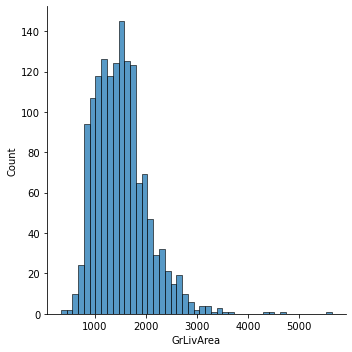

In [19]:
sns.displot(train_house.GrLivArea)
plt.show()

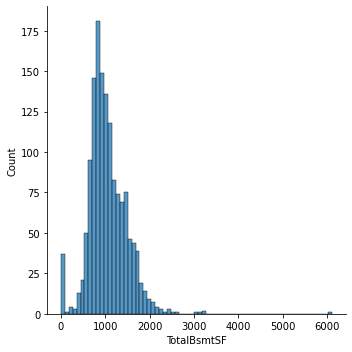

In [20]:
sns.displot(train_house.TotalBsmtSF)
plt.show()

In [21]:
train_house.GrLivArea = train_house.GrLivArea[train_house.GrLivArea <  np.quantile(train_house['GrLivArea'], 0.95)]

In [22]:
train_house.TotalBsmtSF = train_house.TotalBsmtSF[train_house.TotalBsmtSF <  np.quantile(train_house['TotalBsmtSF'], 0.95)]

In [23]:
columns_with_object = list(train_house.select_dtypes(include=['object']).columns)

In [24]:
columns_to_encode = columns_with_object

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), columns_to_encode)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', LinearRegression())
])

X = train_house.drop(columns=['SalePrice'])
y =  train_house['SalePrice']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

pipe = pipeline.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 41611.9611


In [25]:
rmsle(y_test, y_pred)

0.2141958639863553